In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mall customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID', axis=1, inplace=True)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
   df.rename(columns={'Annual Income (k$)':'income', 'Age':'age', 'Spending Score (1-100)':'scores'} , inplace=True)

In [7]:
df.head()

,Gender,age,income,scores
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


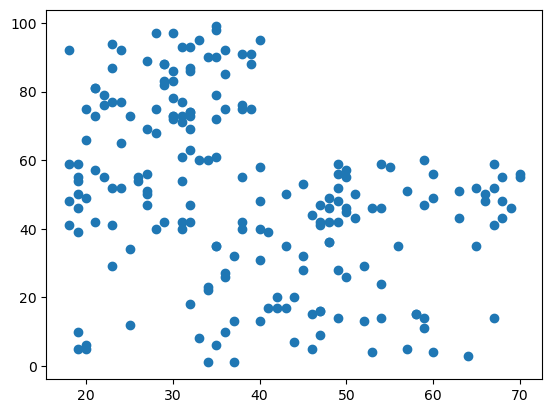

In [8]:
#visualization
plt.scatter(df.age, df.scores)

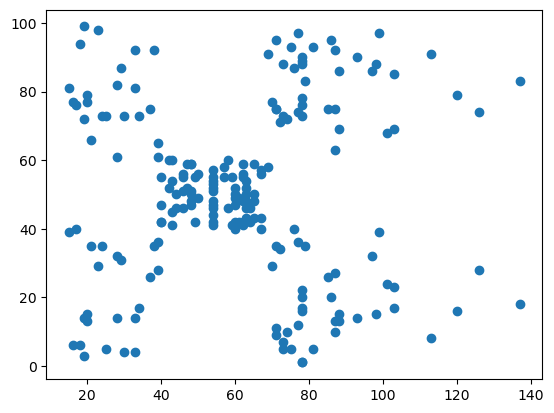

In [9]:

plt.scatter(df.income, df.scores)

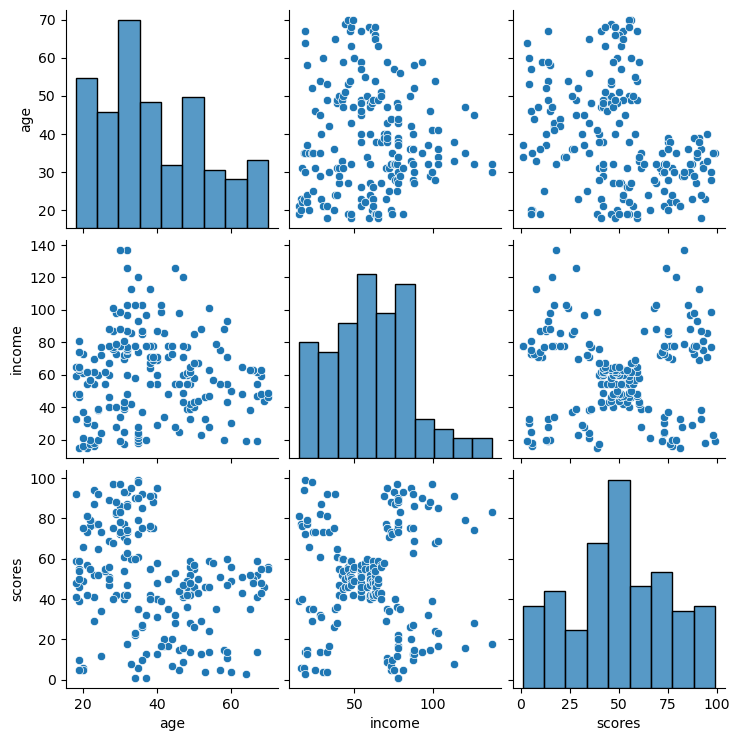

In [10]:
sns.pairplot(df[['age', 'income', 'scores']])      #sobar sate sobar relation

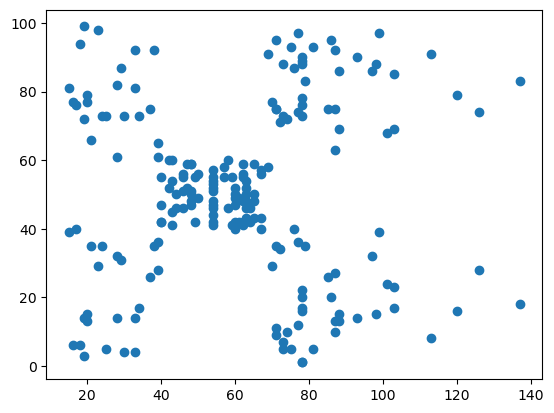

In [11]:
plt.scatter(df.income, df.scores)

In [12]:
from sklearn.model_selection import train_test_split   #no need
train, test = train_test_split(df, test_size= .20)

In [13]:
train.to_csv('train data.csv')                      #no need

In [14]:
import sklearn.cluster as cluster

In [15]:
kmean1 = cluster.KMeans()

In [16]:
kmean1.fit(df[['income', 'scores']])

KMeans()

In [17]:
kmean1.predict(df[['income', 'scores']])

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 6, 6,
       4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 0, 6, 6, 6, 6, 6,
       6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5,
       7, 5])

In [18]:
# kmean1.fit_predict(df[['income', 'scores']])

In [19]:
df['predicted cluster'] = kmean1.predict(df[['income', 'scores']])

In [20]:
df.head()

,Gender,age,income,scores,predicted cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


In [21]:
df.tail()

,Gender,age,income,scores,predicted cluster
195,Female,35,120,79,5
196,Female,45,126,28,7
197,Male,32,126,74,5
198,Male,32,137,18,7
199,Male,30,137,83,5


In [22]:
center1 = kmean1.cluster_centers_

In [23]:
center1 

array([[ 63.95238095,  46.21428571],
       [ 78.55172414,  82.17241379],
       [ 80.18181818,  12.68181818],
       [ 25.0952381 ,  80.04761905],
       [ 25.72727273,  20.22727273],
       [109.7       ,  82.        ],
       [ 47.65909091,  51.61363636],
       [109.7       ,  22.        ]])

# Vizualisation

In [24]:
df0 = df[df['predicted cluster'] == 0]
df1 = df[df['predicted cluster'] == 1]
df2 = df[df['predicted cluster'] == 2]
df3 = df[df['predicted cluster'] == 3]
df4 = df[df['predicted cluster'] == 4]
df5 = df[df['predicted cluster'] == 5]
df6 = df[df['predicted cluster'] == 6]
df7 = df[df['predicted cluster'] == 7]

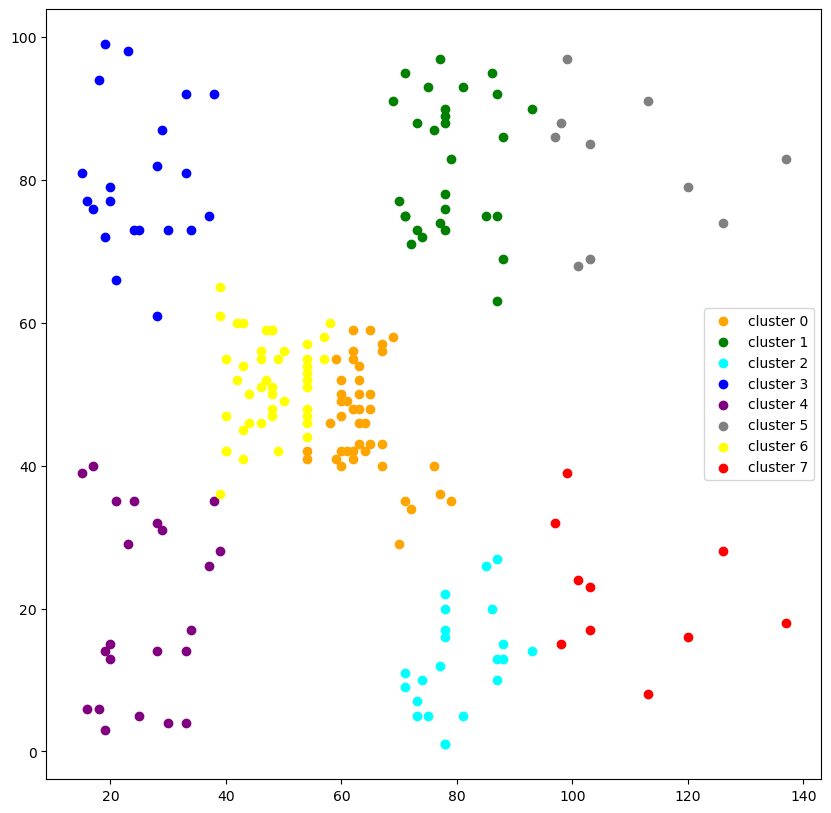

In [25]:
plt.figure(figsize=(10, 10))
plt.scatter(df0['income'], df0['scores'], color='orange', label='cluster 0')
plt.scatter(df1['income'], df1['scores'], color='green', label='cluster 1')
plt.scatter(df2['income'], df2['scores'], color='cyan', label='cluster 2')
plt.scatter(df3['income'], df3['scores'], color='blue', label='cluster 3')
plt.scatter(df4['income'], df4['scores'], color='purple', label='cluster 4')
plt.scatter(df5['income'], df5['scores'], color='gray', label='cluster 5')
plt.scatter(df6['income'], df6['scores'], color='yellow', label='cluster 6')
plt.scatter(df7['income'], df7['scores'], color='red', label='cluster 7')
plt.legend()


# Tuning

In [26]:
from sklearn.cluster import KMeans

In [27]:
wcss = []

clusters = range(1, 16)

for k in clusters:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df[['scores', 'income']])
    wcss.append(kmeans.inertia_)                       #sum of the squared distance

In [28]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25024.844459482734,
 22143.22210076745,
 19669.71099830122,
 18074.621701486918,
 15845.619372815672,
 14408.827436810501,
 13147.857713837884,
 11682.825838292143]

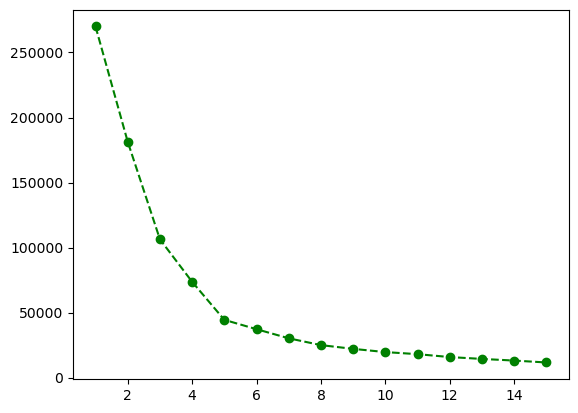

In [29]:
plt.plot(clusters, wcss, 'go--')

In [30]:
!pip install --upgrade kneed
import warnings
warnings.filterwarnings('ignore')


In [31]:
from kneed import KneeLocator

In [32]:
kn = KneeLocator(clusters, wcss, curve='convex', direction='decreasing')

In [33]:
kn.knee

5

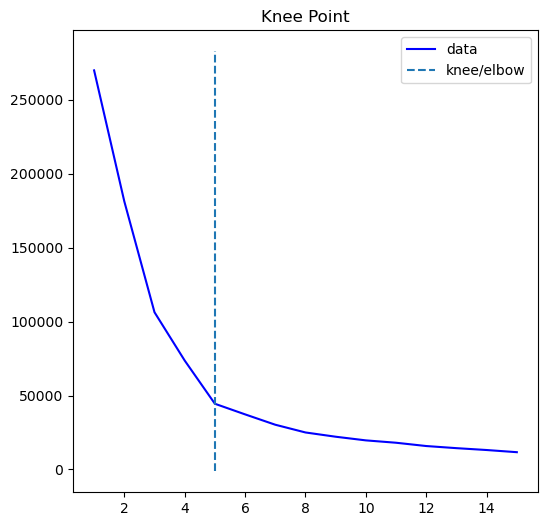

In [34]:
kn.plot_knee()

# K=5; CLUSTER=5

In [35]:
kmean2 = cluster.KMeans(n_clusters=kn.knee)

In [36]:
kmean2

KMeans(n_clusters=5)

In [37]:
df['new clusters'] = kmean2.fit_predict(df[['income', 'scores']])

In [38]:
df.head()

,Gender,age,income,scores,predicted cluster,new clusters
0,Male,19,15,39,4,4
1,Male,21,15,81,3,0
2,Female,20,16,6,4,4
3,Female,23,16,77,3,0
4,Female,31,17,40,4,4


In [39]:
df0 = df[df['new clusters'] == 0]
df1 = df[df['new clusters'] == 1]
df2 = df[df['new clusters'] == 2]
df3 = df[df['new clusters'] == 3]
df4 = df[df['new clusters'] == 4]
df5 = df[df['new clusters'] == 5]


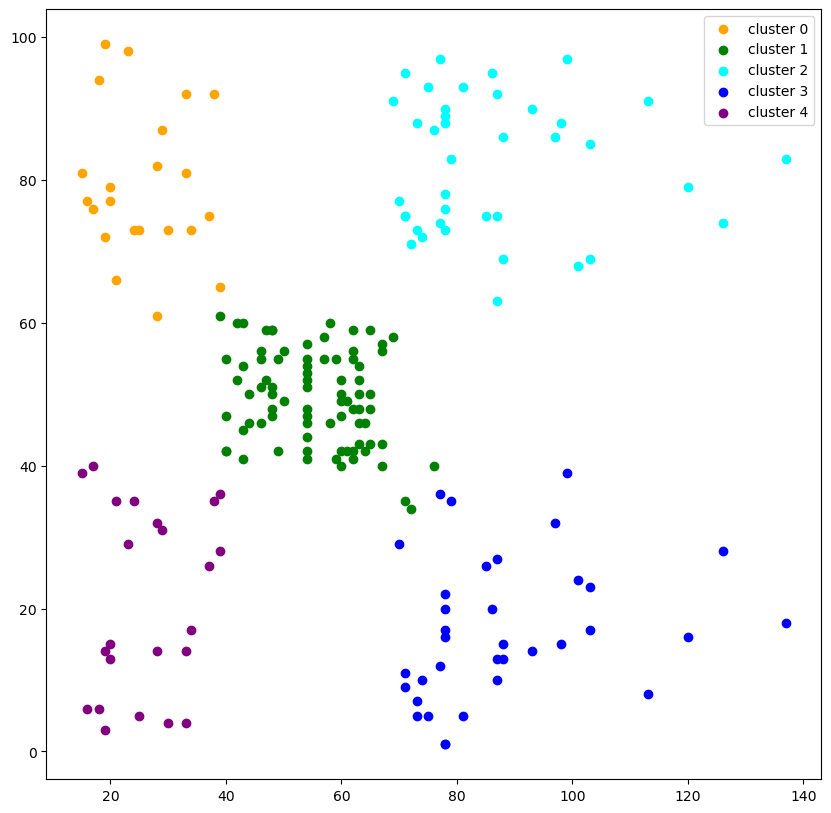

In [40]:
plt.figure(figsize=(10, 10))
plt.scatter(df0['income'], df0['scores'], color='orange', label='cluster 0')
plt.scatter(df1['income'], df1['scores'], color='green', label='cluster 1')
plt.scatter(df2['income'], df2['scores'], color='cyan', label='cluster 2')
plt.scatter(df3['income'], df3['scores'], color='blue', label='cluster 3')
plt.scatter(df4['income'], df4['scores'], color='purple', label='cluster 4')
plt.legend()

In [41]:
centers = kmean2.cluster_centers_

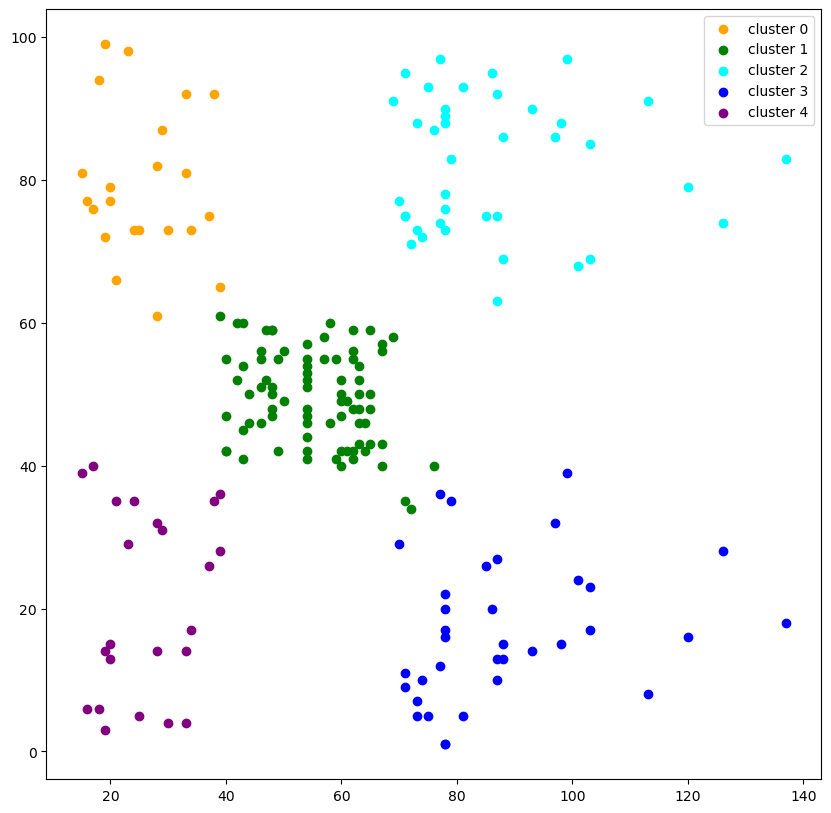

In [42]:
plt.figure(figsize=(10, 10))
plt.scatter(df0['income'], df0['scores'], color='orange', label='cluster 0')
plt.scatter(df1['income'], df1['scores'], color='green', label='cluster 1')
plt.scatter(df2['income'], df2['scores'], color='cyan', label='cluster 2')
plt.scatter(df3['income'], df3['scores'], color='blue', label='cluster 3')
plt.scatter(df4['income'], df4['scores'], color='purple', label='cluster 4')
plt.legend()

In [43]:
kmean2.cluster_centers_                 #find center

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

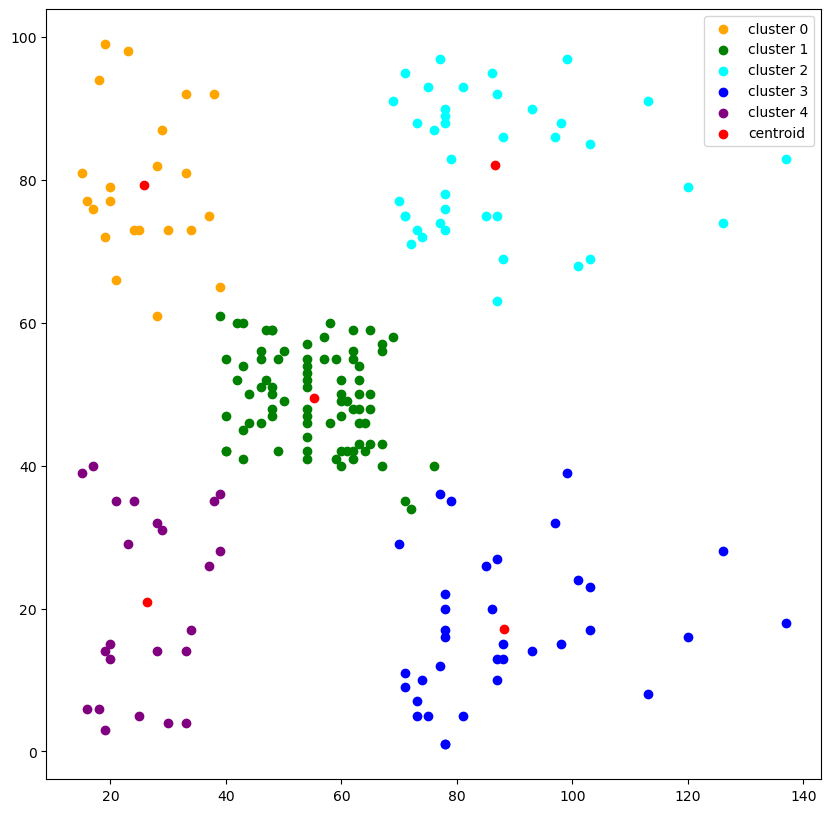

In [44]:
plt.figure(figsize=(10, 10))
plt.scatter(df0['income'], df0['scores'], color='orange', label='cluster 0')
plt.scatter(df1['income'], df1['scores'], color='green', label='cluster 1')
plt.scatter(df2['income'], df2['scores'], color='cyan', label='cluster 2')
plt.scatter(df3['income'], df3['scores'], color='blue', label='cluster 3')
plt.scatter(df4['income'], df4['scores'], color='purple', label='cluster 4')


plt.scatter(centers[:,0], centers[:,1], color='red', label='centroid')

plt.legend()

In [45]:
kmean2.predict([[14, 40]])

array([4])